In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers,datasets,models
from pathlib import Path as pt
import glob

In [2]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dr = tf.keras.utils.get_file('flowers_photos',origin = dataset_url, cache_dir = '.', untar = True)

In [3]:
data_dr = pt(data_dr)
data_dr
## converts string path to window path 

WindowsPath('datasets/flowers_photos')

iglob differs from glob in that it returns an iterator “which yields the same values as glob without storing them all simultaneously,” according to the documentation. This should provide improved performance versus glob.

In [4]:
classes = list(glob.glob('datasets/flower_photos/roses/**/*.jpg',recursive=True))
## making the list of jpgs of every jpg in the directory

In [5]:
classes
## classes of roses 

['datasets/flower_photos/roses\\10090824183_d02c613f10_m.jpg',
 'datasets/flower_photos/roses\\102501987_3cdb8e5394_n.jpg',
 'datasets/flower_photos/roses\\10503217854_e66a804309.jpg',
 'datasets/flower_photos/roses\\10894627425_ec76bbc757_n.jpg',
 'datasets/flower_photos/roses\\110472418_87b6a3aa98_m.jpg',
 'datasets/flower_photos/roses\\11102341464_508d558dfc_n.jpg',
 'datasets/flower_photos/roses\\11233672494_d8bf0a3dbf_n.jpg',
 'datasets/flower_photos/roses\\11694025703_9a906fedc1_n.jpg',
 'datasets/flower_photos/roses\\118974357_0faa23cce9_n.jpg',
 'datasets/flower_photos/roses\\11944957684_2cc806276e.jpg',
 'datasets/flower_photos/roses\\12045735155_42547ce4e9_n.jpg',
 'datasets/flower_photos/roses\\12165480946_c4a3fe182d_n.jpg',
 'datasets/flower_photos/roses\\12202373204_34fb07205b.jpg',
 'datasets/flower_photos/roses\\12238827553_cf427bfd51_n.jpg',
 'datasets/flower_photos/roses\\12240165555_98625b1e88_n.jpg',
 'datasets/flower_photos/roses\\12240303_80d87f77a3_n.jpg',
 'datas

In [6]:
root_directory = './datasets/flower_photos'

# Get a list of all folders in the root directory
folders = [folder for folder in os.listdir(root_directory) if os.path.isdir(os.path.join(root_directory, folder))]
fold = { }

# Iterate over each folder
for folder in folders:
    # Create the pattern for the current folder
    pattern = os.path.join(root_directory, folder, '**/*.jpg')
    
    
    # Use glob() function to find files matching the pattern
    fold[folder] = list(glob.glob(pattern, recursive=True))

In [7]:
fold[folders[0]]

['./datasets/flower_photos\\daisy\\100080576_f52e8ee070_n.jpg',
 './datasets/flower_photos\\daisy\\10140303196_b88d3d6cec.jpg',
 './datasets/flower_photos\\daisy\\10172379554_b296050f82_n.jpg',
 './datasets/flower_photos\\daisy\\10172567486_2748826a8b.jpg',
 './datasets/flower_photos\\daisy\\10172636503_21bededa75_n.jpg',
 './datasets/flower_photos\\daisy\\102841525_bd6628ae3c.jpg',
 './datasets/flower_photos\\daisy\\1031799732_e7f4008c03.jpg',
 './datasets/flower_photos\\daisy\\10391248763_1d16681106_n.jpg',
 './datasets/flower_photos\\daisy\\10437754174_22ec990b77_m.jpg',
 './datasets/flower_photos\\daisy\\10437770546_8bb6f7bdd3_m.jpg',
 './datasets/flower_photos\\daisy\\10437929963_bc13eebe0c.jpg',
 './datasets/flower_photos\\daisy\\10466290366_cc72e33532.jpg',
 './datasets/flower_photos\\daisy\\10466558316_a7198b87e2.jpg',
 './datasets/flower_photos\\daisy\\10555749515_13a12a026e.jpg',
 './datasets/flower_photos\\daisy\\10555815624_dc211569b0.jpg',
 './datasets/flower_photos\\daisy

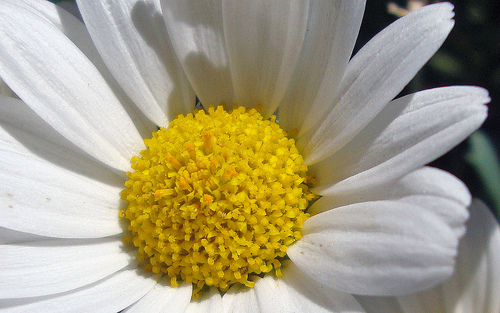

In [8]:
PIL.Image.open(fold[folders[0]][1]) 

In [9]:
fold["daisy"][0]

'./datasets/flower_photos\\daisy\\100080576_f52e8ee070_n.jpg'

In [10]:
img = cv2.imread(fold["daisy"][0])

In [11]:
img.shape

(263, 320, 3)

In [12]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [13]:
x , y = [] , []
count=0
for folder,images in fold.items():
    for i in images:
        img = cv2.imread(str(i))
        x.append(cv2.resize(img ,(180,180)))
        if folders[count] == folder:
            y.append(count)
        else:
            count=count+1
            y.append(count)

In [14]:
x[0]

array([[[134, 136, 136],
        [142, 142, 142],
        [146, 146, 146],
        ...,
        [152, 154, 154],
        [153, 153, 153],
        [151, 151, 151]],

       [[132, 134, 134],
        [140, 141, 141],
        [146, 146, 146],
        ...,
        [153, 155, 155],
        [153, 153, 153],
        [150, 150, 150]],

       [[131, 133, 134],
        [138, 140, 140],
        [144, 144, 145],
        ...,
        [152, 154, 154],
        [151, 151, 151],
        [146, 146, 146]],

       ...,

       [[ 26,  47,  44],
        [ 26,  47,  44],
        [ 26,  47,  44],
        ...,
        [125, 126, 130],
        [125, 126, 130],
        [125, 126, 130]],

       [[ 26,  47,  44],
        [ 26,  47,  44],
        [ 26,  47,  44],
        ...,
        [126, 127, 131],
        [125, 126, 130],
        [125, 126, 130]],

       [[ 26,  47,  44],
        [ 26,  47,  44],
        [ 26,  47,  44],
        ...,
        [127, 128, 132],
        [126, 128, 131],
        [126, 128, 131]]

In [15]:
x=np.array(x)
y=np.array(y)

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0)

In [17]:
len(x_train) + len(x_test)

3670

In [18]:
len(y_train)

2752

In [19]:
x_train_scaled = x_train / 255
x_test_scaled = x_test / 255

In [20]:
x_train_scaled.shape

(2752, 180, 180, 3)

In [21]:
from tensorflow.keras.models import Sequential

In [23]:
## without data augmentation 
mans = keras.models.Sequential([
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPooling2D(), 
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    ## dense
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(5)
])

mans.compile(
    optimizer='adam',
    loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'])

In [24]:
mans.fit(x_train_scaled,y_train, epochs = 10)

Epoch 1/10
86/86 [==============================] - 33s 387ms/step - loss: 1.1019 - accuracy: 0.5632
Epoch 2/10
86/86 [==============================] - 36s 424ms/step - loss: 0.9018 - accuracy: 0.6559
Epoch 3/10
86/86 [==============================] - 34s 392ms/step - loss: 0.6815 - accuracy: 0.7416
Epoch 4/10
86/86 [==============================] - 31s 357ms/step - loss: 0.4814 - accuracy: 0.8212
Epoch 5/10
86/86 [==============================] - 31s 361ms/step - loss: 0.2943 - accuracy: 0.9062
Epoch 6/10
86/86 [==============================] - 30s 352ms/step - loss: 0.1595 - accuracy: 0.9499
Epoch 7/10
86/86 [==============================] - 33s 385ms/step - loss: 0.0951 - accuracy: 0.9727
Epoch 8/10
86/86 [==============================] - 31s 364ms/step - loss: 0.0734 - accuracy: 0.9797
Epoch 9/10
86/86 [==============================] - 31s 361ms/step - loss: 0.0237 - accuracy: 0.9971
Epoch 10/10
86/86 [==============================] - 29s 333ms/step - loss: 0.0108 - accura

In [25]:
mans.evaluate(x_test_scaled,y_test)
## there is a huge difference between test and train accuracy --> this is due to overfitting 

29/29 [==============================] - 2s 70ms/step - loss: 2.4731 - accuracy: 0.6580


[2.473055601119995, 0.657952070236206]

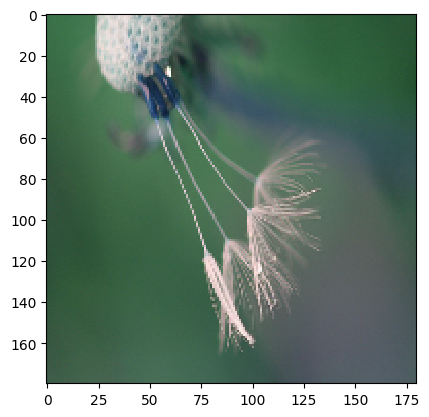

In [26]:
plt.imshow(x_test_scaled[0], interpolation='nearest')
plt.show()

In [27]:
y_test[0]

1

In [44]:
data_augmentation = keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal",input_shape=(180,180,3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1)
])
## data_augmentation but manually

NotImplementedError: Cannot convert a symbolic Tensor (random_rotation/rotation_matrix/strided_slice:0) to a numpy array. This error may indicate that you're trying to pass a Tensor to a NumPy call, which is not supported

# Augmentation using split-folders

In [24]:
pip install split-folders

Note: you may need to restart the kernel to use updated packages.


In [25]:
import splitfolders

In [30]:
splitfolders.ratio("datasets/flower_photos", output="datasets/flower_photos_mod",
    seed=1337, ratio=(0.75, 0, 0.25), group_prefix=None, move=False)
# this will create train , test and val dataset 

In [57]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   vertical_flip=False)

test_datagen = ImageDataGenerator(rescale = 1./255)
 

In [58]:
training_set = train_datagen.flow_from_directory('./datasets/flower_photos_mod/train',
                                                 target_size = (180, 180),
                                                 batch_size = 64,
                                                 class_mode = 'categorical')

Found 2750 images belonging to 5 classes.


In [59]:
test_set = test_datagen.flow_from_directory('./datasets/flower_photos_mod/test',
                                           target_size = (180, 180),
                                           batch_size = 64,
                                           class_mode = 'categorical')

Found 920 images belonging to 5 classes.


In [60]:
from tensorflow.keras.losses import CategoricalCrossentropy

In [61]:
model = keras.models.Sequential([
    layers.Conv2D(16,3,padding='same',activation='relu',input_shape=(180,180,3)),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPooling2D(), 
    layers.Dropout(0.2),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    
    ## dense
    
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(5, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss= CategoricalCrossentropy(),
    metrics=['accuracy'])

In [62]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 45, 45, 32)        0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 45, 45, 64)        18496     
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 22, 22, 64)       

In [63]:
r = model.fit(
  training_set,
  epochs=30
)

Epoch 1/30
43/43 [==============================] - 29s 675ms/step - loss: 1.7112 - accuracy: 0.3018
Epoch 2/30
43/43 [==============================] - 29s 664ms/step - loss: 1.1906 - accuracy: 0.4869
Epoch 3/30
43/43 [==============================] - 30s 704ms/step - loss: 1.0820 - accuracy: 0.5538
Epoch 4/30
43/43 [==============================] - 29s 675ms/step - loss: 1.0257 - accuracy: 0.5956
Epoch 5/30
43/43 [==============================] - 30s 705ms/step - loss: 0.9307 - accuracy: 0.6436
Epoch 6/30
43/43 [==============================] - 30s 691ms/step - loss: 0.9114 - accuracy: 0.6393
Epoch 7/30
43/43 [==============================] - 30s 703ms/step - loss: 0.8304 - accuracy: 0.6796
Epoch 8/30
43/43 [==============================] - 29s 677ms/step - loss: 0.7795 - accuracy: 0.7076
Epoch 9/30
43/43 [==============================] - 30s 688ms/step - loss: 0.7638 - accuracy: 0.7055
Epoch 10/30
43/43 [==============================] - 30s 693ms/step - loss: 0.7066 - accura

In [64]:
model.evaluate(test_set)

15/15 [==============================] - 2s 124ms/step - loss: 0.9896 - accuracy: 0.7152


[0.989599883556366, 0.7152174115180969]

##  CREATS A LIST OF FOLDERS

In [88]:
root_directory = './datasets/flower_photos'

# Get a list of all folders in the root directory
folders = [folder for folder in os.listdir(root_directory) if os.path.isdir(os.path.join(root_directory, folder))]

# Iterate over each folder
for folder in folders:
    # Create the pattern for the current folder
    pattern = os.path.join(root_directory, folder, '**/*.jpg')
    
    # Use glob() function to find files matching the pattern
    file_paths = glob.glob(pattern, recursive=True)